# Feature Engineering

The goals of this course are to:

-   Understand the importance of feature engineering
-   Learn how to create new features from existing data
-   Learn how to use domain knowledge to create new features
-   Learn how to encode categorical variables for machine learning
-   Learn how to handle missing values in a dataset
-   Learn how to deal with time series data
-   Learn how to scale features for machine learning
-   Learn how to evaluate features
-   Learn how to use Pandas and Scikit-Learn to engineer features

# Basic Techniques

## Imputation

*Imputation* means to fill in missing values with plausible values. There are many
options:

-  A constant value that has meaning within the domain, such as 0, distinct from all
    other values.
-  A value from another randomly selected record.
-  A mean, median or mode value for the column.
-  A value estimated by another predictive model.

We use imputation because many machine learning algorithms do not support missing values. Modern algorithms like XGBoost handle missing values themselves, but it is still a common practice to impute because other algorithms do not.

## Load Data

Fuel economy data from the U.S. Environmental Protection Agency (EPA) for 2019 model year vehicles. The data are available in a CSV file with 82,000 rows and 83 columns.

https://www.fueleconomy.gov/feg/epadata/vehicles.csv


In [1]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [1]:
import pandas as pd
url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv' 

raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')

/var/folders/hq/56kkrd7j1t93yzzn9lky_35m0000gn/T/ipykernel_37126/794973991.py:4: DtypeWarning: Columns (69,71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')


In [19]:
raw

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,13.523182,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
49525,12.935217,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
49526,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
49527,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
raw.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn'

In [3]:
cols = ['year', 'make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr',
    'barrels08', 'city08', 'comb08', 'range', 'evMotor', 'cylinders', 'displ', 'fuelCost08', 
        'fuelType', 'highway08',  'trans_dscr','createdOn']

def to_tz(df_, time_col, tz_offset, tz_name):
    return (df_
            .groupby(tz_offset)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                       .dt.tz_localize(s.name, ambiguous=True)
                       .dt.tz_convert(tz_name))
            )

autos = (raw.loc[:, cols]
         .assign(
            offset=(raw.createdOn.str.extract(r'\d\d:\d\d (?P<offset>[A-Z]{3}?)')
                .replace('EDT', 'EST5EDT')),
            str_date=(raw.createdOn.str.slice(4,19) + ' ' +
                raw.createdOn.str.slice(-4)),
            createdOn=lambda df_: to_tz(df_, 'str_date', 'offset', 'America/New_York')
         )
)
autos.dtypes

year                                     int64
make                                    object
model                                   object
trany                                   object
drive                                   object
VClass                                  object
eng_dscr                                object
barrels08                              float64
city08                                   int64
comb08                                   int64
range                                    int64
evMotor                                 object
cylinders                              float64
displ                                  float64
fuelCost08                               int64
fuelType                                object
highway08                                int64
trans_dscr                              object
createdOn     datetime64[ns, America/New_York]
offset                                  object
str_date                                object
dtype: object

In [6]:
# key insight in Python
# booleans are integers

True + 41

42

In [7]:
False + 41

41

In [4]:
# determining missing values
(autos
 .isna()
 #.sum() # count missing values per column
 .mean().mul(100).round(1) # percentage of missing values per column
 )

year           0.0
make           0.0
model          0.0
trany          0.0
drive          2.4
VClass         0.0
eng_dscr      36.5
barrels08      0.0
city08         0.0
comb08         0.0
range          0.0
evMotor       93.3
cylinders      2.7
displ          2.7
fuelCost08     0.0
fuelType       0.0
highway08      0.0
trans_dscr    69.6
createdOn      0.0
offset         0.0
str_date       0.0
dtype: float64

In [5]:
(raw # original dataset, not the subsetted autos dataframe
 #.select_dtypes('string[pyarrow]')
 .select_dtypes(object) # select string columns
 .isna()
 .sum()
)

drive          1186
eng_dscr      18076
fuelType          0
fuelType1         0
make              0
model             0
mpgData         220
trany            11
VClass            0
baseModel         0
guzzler       46700
trans_dscr    34485
tCharger      38124
sCharger      48398
atvType       43157
fuelType2     47531
rangeA        47536
evMotor       46213
mfrCode       30808
c240Dscr      49388
c240bDscr     49394
createdOn         0
modifiedOn        0
startStop     31689
dtype: int64

## Filling in Missing Values



In [6]:
# where are cylinders missing?

(autos
 .query('cylinders.isna()')
 )

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,offset,str_date
7138,2000,Nissan,Altra EV,NaN,NaN,Midsize Station Wagons,NaN,0.0960,81,85,...,62 KW AC Induction,NaN,NaN,900,Electricity,91,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8144,2001,Ford,Th!nk,NaN,NaN,Two Seaters,NaN,0.1248,74,65,...,27 KW AC Induction,NaN,NaN,1150,Electricity,58,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.2088,45,39,...,67 KW AC Induction,NaN,NaN,1950,Electricity,33,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43968,2026,Volkswagen,ID.4 AWD,Automatic (A1),All-Wheel Drive,Small Sport Utility Vehicle 4WD,NaN,0.0792,108,102,...,210 kW ACPM 3-Phase,NaN,NaN,750,Electricity,96,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43969,2026,Volvo,EX30 Single motor extended range,Automatic (A1),Rear-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0696,127,116,...,200 kW PMSM,NaN,NaN,650,Electricity,104,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43971,2026,Volvo,EX30 Cross Country (18 Inch Wheels),Automatic (A1),All-Wheel Drive,Small Sport Utility Vehicle 4WD,NaN,0.0912,95,89,...,115 and 200 kW PMSM,NaN,NaN,850,Electricity,83,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43972,2026,Volvo,EX30 Cross Country (19 Inch Wheels),Automatic (A1),All-Wheel Drive,Small Sport Utility Vehicle 4WD,NaN,0.0816,106,99,...,115 and 200 kW PMSM,NaN,NaN,750,Electricity,92,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025


In [7]:
# autos_test = 

(autos
 .assign(cylinders=autos.cylinders.fillna(0))
)
# not saved as variable so original autos remains unchanged

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,offset,str_date
0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,19,21,...,NaN,4.0,2.0,2250,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,9,11,...,NaN,12.0,4.9,4250,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,23,27,...,NaN,4.0,2.2,1750,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,10,11,...,NaN,8.0,5.2,4250,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,17,19,...,NaN,4.0,2.2,3200,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,19,22,...,NaN,4.0,2.2,2150,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49525,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,20,23,...,NaN,4.0,2.2,2050,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49526,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,18,21,...,NaN,4.0,2.2,2250,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49527,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,18,21,...,NaN,4.0,2.2,2250,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


In [ ]:
# show rows where the model contains "ev" (case-insensitive)
# autos_test[autos_test["model"].str.contains("EV", case=True, na=False)]

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,offset,str_date
7138,2000,Nissan,Altra EV,NaN,NaN,Midsize Station Wagons,NaN,0.096000,81,85,...,62 KW AC Induction,0.0,NaN,900,Electricity,91,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.112800,81,72,...,50 KW DC,0.0,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.112800,81,72,...,50 KW DC,0.0,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
9212,2002,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.103200,87,78,...,50 KW DC,0.0,NaN,950,Electricity,69,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
10329,2003,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.103200,87,78,...,50 KW DC,0.0,NaN,950,Electricity,69,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43896,2026,Land Rover,Defender 110 Trophy MHEV,Automatic (S8),4-Wheel Drive,Standard Sport Utility Vehicle 4WD,SIDI; Mild Hybrid,17.500588,17,17,...,NaN,6.0,3.0,3600,Premium,18,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43930,2026,Chevrolet,Equinox EV FWD,Automatic (A1),Front-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.074400,117,108,...,180 kW AC Induction,0.0,NaN,700,Electricity,100,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43931,2026,Chevrolet,Blazer EV AWD,Automatic (A1),All-Wheel Drive,Small Sport Utility Vehicle 4WD,NaN,0.096000,92,85,...,67 and 180 kW AC Induction,0.0,NaN,900,Electricity,77,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025
43932,2026,Chevrolet,Equinox EV AWD (11 kW Charger),Automatic (A1),All-Wheel Drive,Small Sport Utility Vehicle 4WD,NaN,0.079200,112,103,...,67 and 180 kW AC Induction,0.0,NaN,750,Electricity,95,NaN,2025-10-03 00:00:00-04:00,EST5EDT,Oct 03 00:00:00 2025


In [8]:
# Create sklearn pipeline to fill in missing cylinders with 0

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# set output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

# create pipeline for cylinders
cyl_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
])

# try it out
cyl_pipe.fit_transform(autos[['cylinders']])

,cylinders
0,4.0
1,12.0
2,4.0
3,8.0
4,4.0
...,...
49524,4.0
49525,4.0
49526,4.0
49527,4.0


In [ ]:
# see where it fill in missing values
(cyl_pipe
 .fit_transform(autos[['cylinders']])
 .loc[autos.cylinders.isna()]
 # .describe() all missing numbers should now be 0.
)

,cylinders
7138,0.0
7139,0.0
8143,0.0
8144,0.0
8146,0.0
...,...
43968,0.0
43969,0.0
43971,0.0
43972,0.0


In [ ]:
# create more realistic pipeline
# set missing cylinders to 0 and displ to median
from sklearn.compose import ColumnTransformer

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']), # tuple of (name, transformer, columns)
        ('displ_imputer', displ_imputer, ['displ'])
    ],
    remainder='passthrough' # keep other columns unchanged
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)]) # only one step here

# Fit and transform the data
pipeline.fit_transform(autos)

,cyl_imputer__cylinders,displ_imputer__displ,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,...,remainder__comb08,remainder__range,remainder__evMotor,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,4.0,2.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,...,21,0,NaN,2250,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,12.0,4.9,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,...,11,0,NaN,4250,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,2.2,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,...,27,0,NaN,1750,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,8.0,5.2,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,...,11,0,NaN,4250,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,4.0,2.2,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,...,19,0,NaN,3200,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,4.0,2.2,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,...,22,0,NaN,2150,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49525,4.0,2.2,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,...,23,0,NaN,2050,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49526,4.0,2.2,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2250,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49527,4.0,2.2,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2250,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


## Binning

*Binning* is a process of transforming continuous numerical variables into discrete categorical 'bins'. Binning is used for:

- Converting a continuous feature to a categorical feature
- Helping with non-linear relationships
- Reducing the effects of noise and outliers
- Handling missing values


<Axes: >

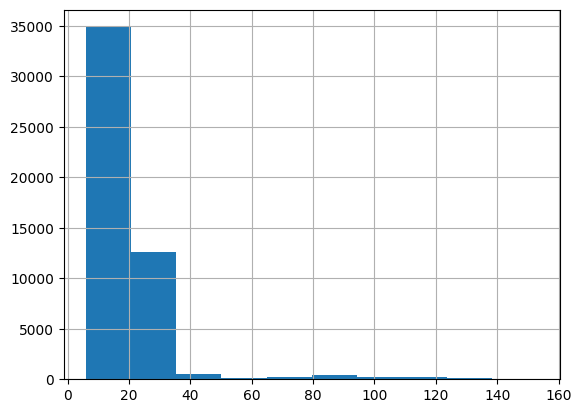

In [ ]:
# Create a histogram of city08

autos.city08.hist()
# very skewed distribution towards the left.

((array([-4.18923735, -3.98338871, -3.87115794, ...,  3.87115794,
          3.98338871,  4.18923735]),
  array([  6,   6,   6, ..., 151, 153, 153])),
 (np.float64(9.592140881305111),
  np.float64(20.55567445335056),
  np.float64(0.6717931315066065)))

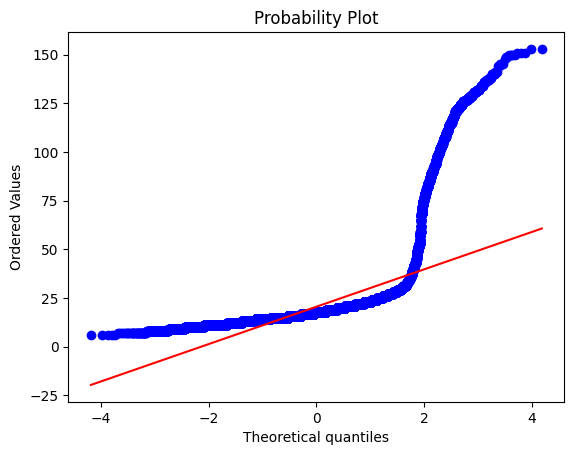

In [ ]:
# use a probability plot to see if it is normally distributed
from scipy import stats
from matplotlib import pyplot as plt

stats.probplot(autos.city08, plot=plt)

# if it was normally distributed, the points would fall on a straight line
# We can also tell because the histogram is heavily skewed to the left and has several outliers on the right.

((array([-4.18075689, -3.97451157, -3.86204916, ...,  3.86204916,
          3.97451157,  4.18075689]),
  array([ 6,  6,  6, ..., 39, 39, 39])),
 (np.float64(4.594155578818397),
  np.float64(18.151737435553507),
  np.float64(0.9785542157456221)))

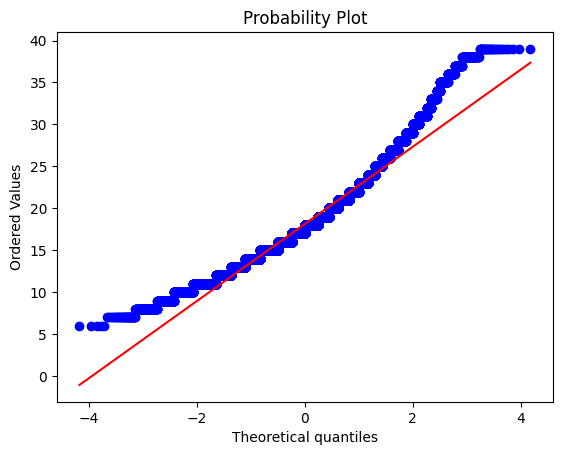

In [ ]:
stats.probplot(autos.query('city08 < 40').city08, plot=plt)

# after removing outliers, the distribution is much closer to normal but still not perfect.

In [ ]:
# bin the city08 data with pandas
pd.cut(autos.city08, bins=10)

# creates a categorical object with the bins as categories
# creates 10 equal-width bins

0        (5.853, 20.7]
1        (5.853, 20.7]
2         (20.7, 35.4]
3        (5.853, 20.7]
4        (5.853, 20.7]
             ...      
49524    (5.853, 20.7]
49525    (5.853, 20.7]
49526    (5.853, 20.7]
49527    (5.853, 20.7]
49528    (5.853, 20.7]
Name: city08, Length: 49529, dtype: category
Categories (10, interval[float64, right]): [(5.853, 20.7] < (20.7, 35.4] < (35.4, 50.1] < (50.1, 64.8] ... (94.2, 108.9] < (108.9, 123.6] < (123.6, 138.3] < (138.3, 153.0]]

<Axes: xlabel='city08'>

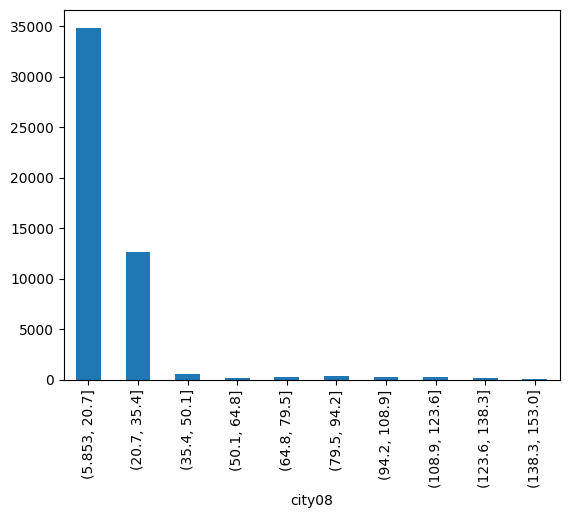

In [ ]:
(pd.cut(autos.city08, bins=10)
 .value_counts() # count how many values fall into each bin
 .sort_index() # sort by bin order
 .plot.bar() # create a bar plot
)

# still not a normal distribution.

<Axes: xlabel='city08'>

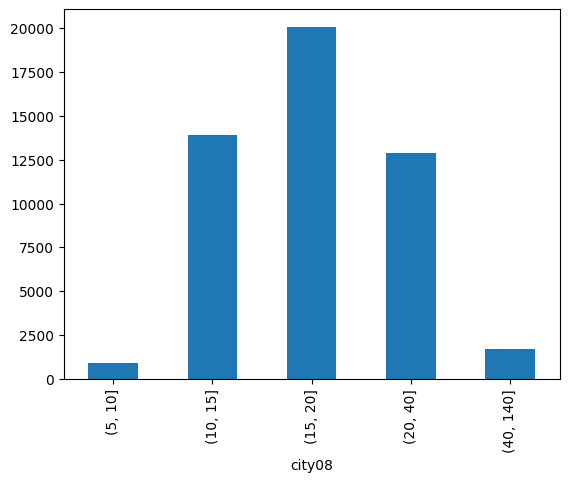

In [ ]:
# manually create edges for bins
(pd.cut(autos.city08, bins=[5,10,15,20,40, 140]) # specify bin edges
 .value_counts()
 .sort_index()
 .plot.bar()
)

# 40-140 to catch the outliers

In [19]:
# binning with sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Define the binning strategy
binning_strategy = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') 
# quantile strategy to create bins with equal number of samples

column_transformer = ColumnTransformer(
    transformers=[
        ('binning', binning_strategy, ['city08'])
    ],
    remainder='passthrough'  # This ensures other columns are left unchanged
)


pipeline = Pipeline(steps=[('transformer', column_transformer)])
pipeline.fit_transform(autos)


,binning__city08,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,remainder__comb08,...,remainder__evMotor,remainder__cylinders,remainder__displ,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,3.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,21,...,NaN,4.0,2.0,2250,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,0.0,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,11,...,NaN,12.0,4.9,4250,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,27,...,NaN,4.0,2.2,1750,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,0.0,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,11,...,NaN,8.0,5.2,4250,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,2.0,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,19,...,NaN,4.0,2.2,3200,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,3.0,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,22,...,NaN,4.0,2.2,2150,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49525,3.0,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,23,...,NaN,4.0,2.2,2050,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49526,2.0,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2250,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49527,2.0,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2250,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


<Axes: xlabel='binning__city08'>

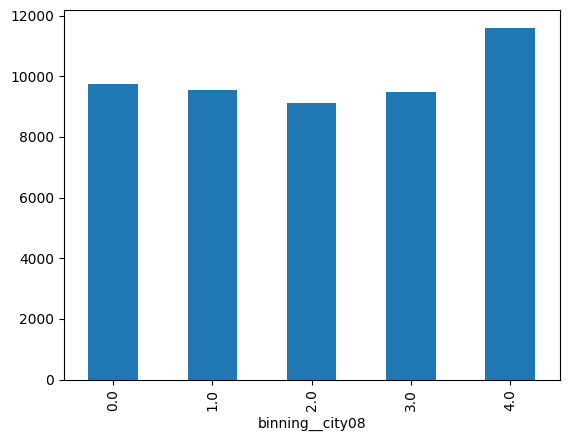

In [ ]:
pipeline.fit_transform(autos).binning__city08.value_counts().sort_index().plot.bar()

# bins have approximately equal number of samples

In [21]:
# pipeline
# combining imputation and binning
cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
binning_strategy = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']), # tuple of (name, transformer, columns)
        ('displ_imputer', displ_imputer, ['displ']),
        ('binning', binning_strategy, ['city08'])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline.fit_transform(autos)

,cyl_imputer__cylinders,displ_imputer__displ,binning__city08,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,...,remainder__comb08,remainder__range,remainder__evMotor,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,4.0,2.0,3.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),...,21,0,NaN,2250,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,12.0,4.9,0.0,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),...,11,0,NaN,4250,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,2.2,4.0,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),...,27,0,NaN,1750,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,8.0,5.2,0.0,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,...,11,0,NaN,4250,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,4.0,2.2,2.0,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",...,19,0,NaN,3200,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,4.0,2.2,3.0,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),...,22,0,NaN,2150,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49525,4.0,2.2,3.0,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),...,23,0,NaN,2050,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49526,4.0,2.2,2.0,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),...,21,0,NaN,2250,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49527,4.0,2.2,2.0,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),...,21,0,NaN,2250,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


## Log Transform

Log transformation is a data transformation method in which it replaces each variable x with a log(x). This is useful when the data is skewed and you are using a model that assumes normality or linearity.

It is also common to use log transformation on the target variable y in regression. 

<Axes: xlabel='city08_log', ylabel='city08'>

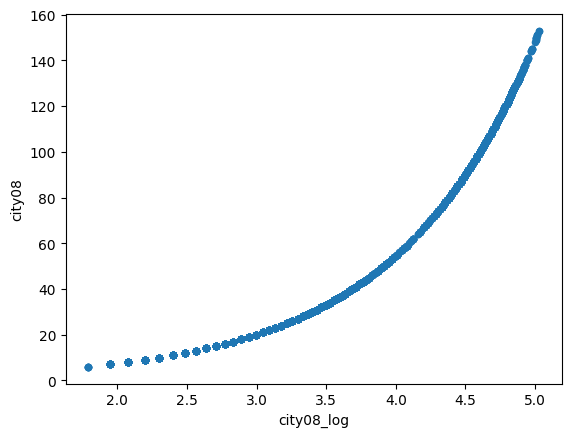

In [22]:
# scatter plot to show log of city08 vs original
import numpy as np
(autos
    .assign(city08_log=np.log(autos.city08))
    .plot.scatter(x='city08_log', y='city08')
    )

<Axes: >

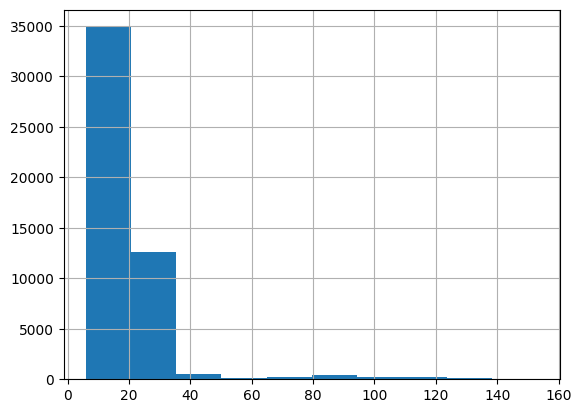

In [ ]:
autos.city08.hist() # skewed left and contains outliers.

<Axes: >

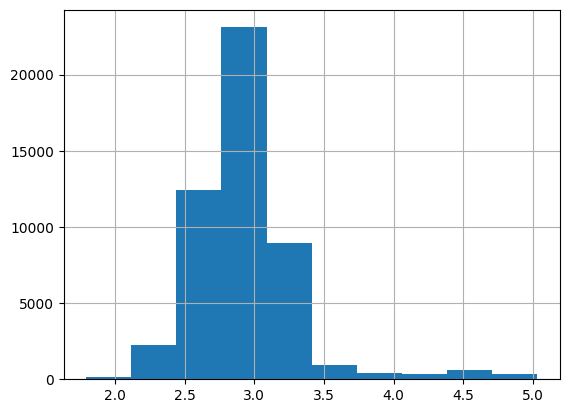

In [ ]:
# scatter plot to show log of city08 vs original

(autos
    .assign(city08_log=np.log(autos.city08))
    .city08_log.hist()
    )

# log transformation makes distribution more normal.

In [25]:
# Baseline model with linear regression to predict city08
# boilerplate code for train-test split and linear regression pipeline - can update and modify as needed.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08']).select_dtypes('number') 
# only numeric columns as linear regression requires numeric input

y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']), # tuple of (name, transformer, columns)
        ('displ_imputer', displ_imputer, ['displ']),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)
# fit and not fit_transform because we don't need to transform y_train.

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('lr', LinearRegression())])

In [ ]:
# score
pipeline.score(X_test, y_test)
# R² score on test set

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.7814798578073061

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pipeline.predict(X_test))

# MAE on test set

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


3.879899807747139

In [28]:
# try again with log transform of y
# create X and y
X = X
y_log = np.log(autos.city08)

# split into train and test
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, random_state=42)

# pipeline
pipeline_log = Pipeline(steps=[('preprocessor', preprocessor), ('lr', LinearRegression())])

# fit the pipeline
pipeline_log.fit(X_train, y_train_log)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('lr', LinearRegression())])

In [ ]:
pipeline_log.score(X_test, y_test_log)
# R² score increases drastically with log transformation of target variable.

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.9086268930671305

In [ ]:
# take exp of predictions and score the mean absolute error
from sklearn.metrics import mean_absolute_error

y_pred_log = np.exp(pipeline_log.predict(X_test))
# because the y variable was log transformed, we need to take the exp of the predictions to get back to original scale.

mean_absolute_error(np.exp(y_test_log), y_pred_log)

# much lower MAE than previous model without log transformation.

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


1.9329857463066098

## Scaling

*Scaling* is an ambiguous term that generally means one of two things:

-  Min-max scaling - Changing the range of a variable to be between 0 and 1 or -1 to 1.
-  Standard scaling (Standardization) - Changing the distribution of a variable to have a mean of 0 and a standard deviation of 1.

We'll show examples of both below.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08']).select_dtypes('number')
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           #('std_scaler', std_scaler),
                           ('minmax_scaler', minmax_scaler), 
                           ('lr', LinearRegression())])

# Generally want the data to be on the same scale for linear regression or logistic regression.
# This is because if we want to analyze the coefficients of the model,
# having features on different scales can distort their relative importance.


pipeline.fit(X_train, y_train)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [66]:
pipeline.score(X_test, y_test)
# R² score increases drastically with log transformation of target variable.

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.7814798578073061

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pipeline.predict(X_test))

# MAE on test set

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


3.879899807747093

## Challenge: Basic Techniques

Predicting mileage from *barrels08*.

- Make a model to predict *city08* from *barrels08* using linear regression.
- What is the score?
- Scatter plot *barrel08* vs *city08*
- Make a new model transforming *barrels08* based on the results of the scatter plot.
- How does the new model perform?




In [38]:
autos.dtypes

year                                     int64
make                                    object
model                                   object
trany                                   object
drive                                   object
VClass                                  object
eng_dscr                                object
barrels08                              float64
city08                                   int64
comb08                                   int64
range                                    int64
evMotor                                 object
cylinders                              float64
displ                                  float64
fuelCost08                               int64
fuelType                                object
highway08                                int64
trans_dscr                              object
createdOn     datetime64[ns, America/New_York]
offset                                  object
str_date                                object
dtype: object

In [69]:
# Baseline model with linear regression to predict city08 from barrels08
# x = barrels08, y = city08

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create X and y
X = autos[['barrels08']]  # ← Need double brackets to make it a DataFrame
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('lr', LinearRegression())
])

# fit the pipeline
pipeline.fit(X_train, y_train)
# fit and not fit_transform because we don't need to transform y_train.

Pipeline(steps=[('lr', LinearRegression())])

In [48]:
# score
print("R² score:", pipeline.score(X_test, y_test))

R² score: 0.5531833456753263


<Axes: xlabel='barrels08', ylabel='city08'>

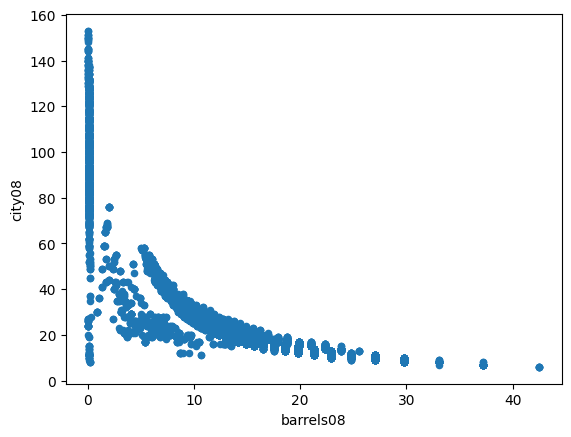

In [70]:
(autos
 .plot.scatter(x='barrels08', y='city08'))

# large skewdness towards the left of the data.

<Axes: xlabel='barrels08_log', ylabel='barrels08'>

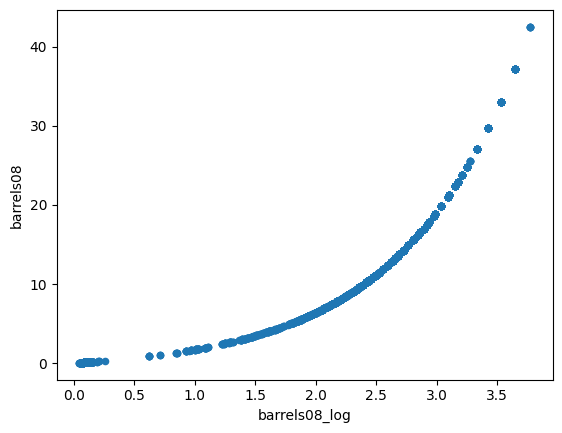

In [75]:
# scatter plot to show log of barrels08 vs original
import numpy as np
(autos
    .assign(barrels08_log=np.log(autos.barrels08+1)) # add 1 to avoid log(0)
    .plot.scatter(x='barrels08_log', y='barrels08')
    )
# More normally distributed after log transformation.

<Axes: xlabel='barrels08_log', ylabel='city08'>

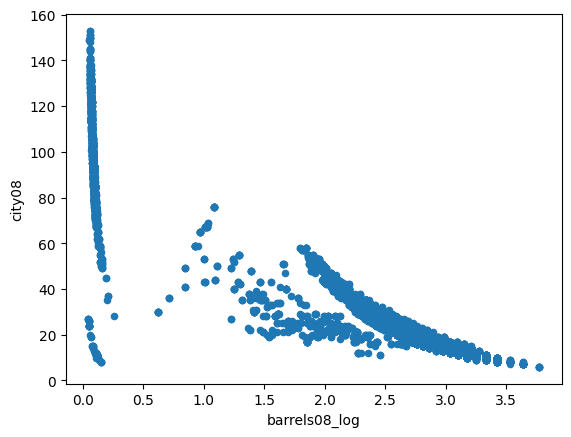

In [78]:
# scatter plot to show log of barrels08 vs city08
import numpy as np
(autos
    .assign(barrels08_log=np.log(autos.barrels08+1)) # add 1 to avoid log(0)
    .plot.scatter(x='barrels08_log', y='city08')
    )
# More normally distributed after log transformation.

In [76]:
# try again with log transform of y
# create X and y
X = autos[['barrels08']]  
# ← Need double brackets to make it a DataFrame, scikit-learn expects X to be a 2D array, doesnt like Series
y_log = np.log(autos.city08)

# split into train and test
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, random_state=42)

# pipeline
pipeline_log = Pipeline(steps=[('lr', LinearRegression())])

# fit the pipeline
pipeline_log.fit(X_train, y_train_log)

Pipeline(steps=[('lr', LinearRegression())])

In [77]:
# score
print("R² score:", pipeline_log.score(X_test, y_test_log))
# Much higher R² score than previous model without log transformation.

R² score: 0.8587108174837559


# Categorical Encoding

## One Hot Encoding

Many ML algorithms cannot work with categorical data directly. The categories must be converted into numbers. This process is called *encoding*. 

One of the most common encodings is *one hot encoding*, also called *dummy encoding*. This creates a new column for each category with a 1 or 0 value.

In [79]:
autos.VClass

0            Two Seaters
1            Two Seaters
2        Subcompact Cars
3                   Vans
4           Compact Cars
              ...       
49524       Compact Cars
49525       Compact Cars
49526       Compact Cars
49527       Compact Cars
49528       Compact Cars
Name: VClass, Length: 49529, dtype: object

In [80]:
pd.get_dummies(autos.VClass)

,Compact Cars,Large Cars,Midsize Cars,Midsize Station Wagons,Midsize-Large Station Wagons,Minicompact Cars,Minivan - 2WD,Minivan - 4WD,Small Pickup Trucks,Small Pickup Trucks 2WD,...,Standard Pickup Trucks 4WD,Standard Pickup Trucks/2wd,Standard Sport Utility Vehicle 2WD,Standard Sport Utility Vehicle 4WD,Subcompact Cars,Two Seaters,Vans,Vans Passenger,"Vans, Cargo Type","Vans, Passenger Type"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49525,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49526,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49527,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
pd.get_dummies(autos.VClass, drop_first=True)

,Large Cars,Midsize Cars,Midsize Station Wagons,Midsize-Large Station Wagons,Minicompact Cars,Minivan - 2WD,Minivan - 4WD,Small Pickup Trucks,Small Pickup Trucks 2WD,Small Pickup Trucks 4WD,...,Standard Pickup Trucks 4WD,Standard Pickup Trucks/2wd,Standard Sport Utility Vehicle 2WD,Standard Sport Utility Vehicle 4WD,Subcompact Cars,Two Seaters,Vans,Vans Passenger,"Vans, Cargo Type","Vans, Passenger Type"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49524,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# Cardinality - number of unique values in a column
# probably don't want to make ~5k model columns
(autos
 .select_dtypes(object) # use 'string[pyarrow]' if using pyarrow types
 .nunique()
)

make           146
model         5492
trany           40
drive            7
VClass          34
eng_dscr       620
evMotor        551
fuelType        15
trans_dscr      52
offset           2
str_date       469
dtype: int64

In [84]:
autos.model

0         Spider Veloce 2000
1                 Testarossa
2                    Charger
3        B150/B250 Wagon 2WD
4           Legacy AWD Turbo
                ...         
49524                 Legacy
49525                 Legacy
49526             Legacy AWD
49527             Legacy AWD
49528       Legacy AWD Turbo
Name: model, Length: 49529, dtype: object

In [85]:
# Cardinality - number of unique values in a column
# probably don't want to make ~5k model columns
(autos
 .select_dtypes(object)
 .nunique()
 .index
)

Index(['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'offset', 'str_date'],
      dtype='object')

In [86]:
# categorical encoding in pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),

        ('one_hot_encoder', one_hot_encoder, ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ],),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)


ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").

In [ ]:
# Impute missing values AND convert Pandas 2 strings to Pandas 1 strings
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_imputer', cat_imputer, cat_cols),
        ('one_hot_encoder', one_hot_encoder, cat_cols), 
# encode after imputing missing values may run parellelly with the cat imputer rather than sequentially causes a ValueError
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train.assign(**X_train.select_dtypes('string[pyarrow]').astype(str)), y_train)


ValueError: could not convert string to float: 'Chevrolet'

In [88]:
# Debug with FunctionTransformer
# And figure out that I need a separate pipeline for categorical columns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]

# create a pipeline for categorical columns, this will allow the cat imputer and one hot encoder to be applied sequentially
cat_pipe = Pipeline([
    ('cat_imputer', cat_imputer),
    ('one_hot_encoder', one_hot_encoder)
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_pl', cat_pipe, cat_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                           ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x14aec4430>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [89]:
tmp_X

,cyl_imputer__cylinders,displ_imputer__displ,cat_pl__make_Chevrolet,cat_pl__make_Dodge,cat_pl__make_Ford,cat_pl__make_GMC,cat_pl__make_Mercedes-Benz,cat_pl__make_Nissan,cat_pl__make_Porsche,cat_pl__make_Toyota,...,cat_pl__trans_dscr_CLKUP,cat_pl__trans_dscr_Creeper,cat_pl__trans_dscr_EMS 2MODE CLKUP,cat_pl__trans_dscr_SIL,cat_pl__trans_dscr_missing,cat_pl__trans_dscr_infrequent_sklearn,remainder__year,remainder__barrels08,remainder__range,remainder__fuelCost08
44070,8.0,5.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1988,22.885385,0,3600
1563,6.0,4.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1994,18.594375,0,3800
27468,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2015,10.625357,0,1650
30683,4.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2017,9.917000,0,1550
40337,4.0,2.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1985,11.900400,0,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.0,5.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2004,19.834000,0,3100
44732,6.0,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1989,14.167143,0,2250
38158,8.0,5.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2022,16.528333,0,2600
860,6.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1994,14.875500,0,3050


In [90]:
pipeline.score(X_test, y_test)

ValueError: Found unknown categories ['STI', 'General Motors', 'Isis Imports Ltd', 'Qvale', 'Kandi', 'S and S Coach Company  E.p. Dutton', 'SRT'] in column 0 during transform

In [ ]:
# Deal with missing categories in test set w/ handle_unknown='ignore'
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Add handle_unknown='ignore' to OneHotEncoder
# one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False)
cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]

cat_pipe = Pipeline([
    ('cat_imputer', cat_imputer),
    ('one_hot_encoder', one_hot_encoder)
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_pl', cat_pipe, cat_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})), 
                                                                            # kw_args allows passing arguments to the function
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)


/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x14aec4280>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [92]:
pipeline.score(X_test, y_test)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 5, 6, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.9318220005107465

## Hash Encoding

*Hash encoding* is a technique that can be used when there are too many categories to encode with one hot encoding. It is similar to one hot encoding, but the categories are hashed into a smaller number of columns.

We are going to use the `category_encoders` library to do the encoding. This library has many other encoders that you can explore.

In [93]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
(autos
 .select_dtypes(object)
 .nunique()
)

# model has too many unique values (5000+) to one-hot encode effectively
# use hash encoding as a solution

make           146
model         5492
trany           40
drive            7
VClass          34
eng_dscr       620
evMotor        551
fuelType        15
trans_dscr      52
offset           2
str_date       469
dtype: int64

In [96]:
(autos
 .select_dtypes(object) # select only object/string columns
 .nunique()
 .pipe(lambda s: s[s > 40]) # pipe expects a function and the type of data (series), which is why we use lambda s
 # only keeps the columns with more than 40 unique values
 .index
)


Index(['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr', 'str_date'], dtype='object')

In [97]:
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


In [ ]:
# low cardinality columns
(autos
 .select_dtypes(object)
 .nunique()
 .index
 .difference(high_cardinality_cols) # automatically removes high cardinality columns
)

Index(['VClass', 'drive', 'fuelType', 'offset', 'str_date', 'trany'], dtype='object')

In [99]:
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']

In [100]:
# replace one hot encoder with hashing encoder for high cardinality columns
from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# add hashing encoder
cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        #('cat_pl', cat_pipe, cat_cols),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols), # tuple of (name, transformer, columns)
        ('hashing_encoder', hashing_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)


/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False),
                                                  ['VClass', 'drive',
                                                   'fuelType', 'trany']),
                                                 ('hashing_encoder',
                                                  HashingEncoder(drop_invariant=True,
                                                                 max_process=5,
                                                                 n_components=10),
                                                  ['make', 'model', 'eng_dscr',
                                                   'evMotor',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x14af273a0>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [101]:
pipeline.score(X_test, y_test)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.9259771621102187

In [102]:
tmp_X

,cyl_imputer__cylinders,displ_imputer__displ,one_hot_encoder__VClass_Large Cars,one_hot_encoder__VClass_Midsize Cars,one_hot_encoder__VClass_Small Sport Utility Vehicle 4WD,one_hot_encoder__VClass_Sport Utility Vehicle - 4WD,one_hot_encoder__VClass_Standard Pickup Trucks,one_hot_encoder__VClass_Standard Sport Utility Vehicle 4WD,one_hot_encoder__VClass_Subcompact Cars,one_hot_encoder__VClass_Two Seaters,...,hashing_encoder__col_4,hashing_encoder__col_5,hashing_encoder__col_6,hashing_encoder__col_7,hashing_encoder__col_8,hashing_encoder__col_9,remainder__year,remainder__barrels08,remainder__range,remainder__fuelCost08
40040,8.0,5.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,2023,19.834000,0,4050
48527,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1992,15.658421,0,2450
34599,4.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1988,14.875500,0,2350
21967,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,1,0,2011,13.523182,0,2800
20693,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,2010,14.875500,0,2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,1,2007,11.018889,0,1750
40436,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,2024,11.018889,0,2250
1839,6.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,2,0,1,0,1995,14.875500,0,2350
8500,6.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1986,16.528333,0,2600


# Target Encoding

From docstring: [In Target Encoding] Each category is encoded based on a shrunk estimate of the average target
values for observations belonging to the category. The encoding scheme mixes
the global target mean with the target mean conditioned on the value of the
category.


In [103]:
from sklearn.preprocessing import TargetEncoder

te = TargetEncoder(target_type='continuous', random_state=42)
te.fit_transform(X_train[['make']], y_train)

,make
44070,17.546810
1563,17.551809
27468,28.400500
30683,17.546810
40337,15.922250
...,...
11284,17.585533
44732,17.740280
38158,17.782323
860,20.817855


In [104]:
# replace hashing encoder with target encoder for high cardinality columns
from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median
cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False),
                                                  ['VClass', 'drive',
                                                   'fuelType', 'trany']),
                                                 ('target_encoder',
                                                  TargetEncoder(random_state=42,
                                                                target_type='continuous'),
                                                  ['make', 'model', 'eng_dscr',
                                                   'evMotor',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x16c238e50>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [105]:
X = autos[['barrels08']]
y = autos['city08']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline = Pipeline(steps=[('lr', LinearRegression())])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.5531833456753263

In [107]:
# make a custom class transformer to remove PyArrow strings (if using PyArrow)
from sklearn.base import BaseEstimator, TransformerMixin

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.assign(**X.select_dtypes('string[pyarrow]').astype(str))

In [108]:
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
    ('std_scaler', std_scaler),
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)


/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('string_converter', PyArrowStringConverter()),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_cat...
                                                                sparse_output=False),
                                                  ['VClass', 'drive',
                                                   'fuelType', 'trany']),
                                                 ('target_encoder',
                                                  TargetEncoder(random_state=42,
                                                                target_type='continuous'),
                                                  ['make', 'model', 'eng_dscr',
                                                   'evMotor',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x14af27160>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
pipeline.score(X_test, y_test)
# boosts the score signicantly.

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.9482005044108761

## Categorical Challenge

Create a model to predict mileage using only the categorical columns (dropping the *model* column)

```
cat_cols = ['trany', 'drive', 'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr']
```

In [124]:
autos.dtypes.index

Index(['year', 'make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr',
       'barrels08', 'city08', 'comb08', 'range', 'evMotor', 'cylinders',
       'displ', 'fuelCost08', 'fuelType', 'highway08', 'trans_dscr',
       'createdOn', 'offset', 'str_date'],
      dtype='object')

In [ ]:
autos.barrels08

0        14.167143
1        27.046364
2        11.018889
3        27.046364
4        15.658421
           ...    
49524    13.523182
49525    12.935217
49526    14.167143
49527    14.167143
49528    16.528333
Name: barrels08, Length: 49529, dtype: float64

In [121]:
(autos
 .select_dtypes(object)
 .nunique()
 .index
)

Index(['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'offset', 'str_date'],
      dtype='object')

In [125]:
# find high cardinality columns
(autos
 .select_dtypes(object)
 .nunique()
 .pipe(lambda s: s[s > 40])
 .index
)

Index(['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr', 'str_date'], dtype='object')

In [127]:
high_cardinality_cols = ['make', 'eng_dscr', 'evMotor', 'trans_dscr'] # leaving out model

In [126]:
# get low cardinality columns
(autos
 .select_dtypes(object)
 .nunique()
 .index
 .difference(high_cardinality_cols)
)

Index(['VClass', 'drive', 'fuelType', 'offset', 'str_date', 'trany'], dtype='object')

In [128]:
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'offset', 'str_date', 'trany']

In [138]:
# using the pipeline to predict barrels08 from only the categorical columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, TargetEncoder
from sklearn import set_config

# set config
set_config(transform_output='pandas')

# create X and y
X = autos[['trany', 'drive', 'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr']]
# excluded model and numeric columns
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a pipeline with the cat_cols imputer
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
target_encoder = TargetEncoder(target_type='continuous', random_state=42)
# hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True) could also use this for the high cardinality columns

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols = ['VClass', 'drive', 'fuelType', 'trany',
            'eng_dscr', 'evMotor', 'trans_dscr']

low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['eng_dscr', 'evMotor', 'trans_dscr'] # leaving out model

# create the columns transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False),
                                                  ['VClass', 'drive',
                                                   'fuelType', 'trany']),
                                                 ('target_encoder',
                                                  TargetEncoder(random_state=42,
                                                                target_type='continuous'),
                                                  ['eng_dscr', 'evMotor',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x14a9fe280>,
                                     kw_args={'name': 'tmp_X'})),
                ('lr', LinearRegression())])

In [135]:
X

,trany,drive,VClass,eng_dscr,evMotor,fuelType,trans_dscr
0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),NaN,Regular,NaN
1,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),NaN,Regular,NaN
2,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),NaN,Regular,SIL
3,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,NaN,Regular,NaN
4,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",NaN,Premium,NaN
...,...,...,...,...,...,...,...
49524,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),NaN,Regular,CLKUP
49525,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),NaN,Regular,NaN
49526,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),NaN,Regular,CLKUP
49527,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),NaN,Regular,NaN


In [139]:
pipeline.score(X_test, y_test)

/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/faith/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


0.8986341702869876

In [ ]:
# X = (autos.loc[:, cat_cols]) another way of selecting all cat_cols

# autos.loc[:, cat_cols] (.loc(row, column))
#         ↑    ↑
#         │    └─ Columns: All columns in cat_cols list
#         └────── Rows: All rows (: means "all") 

In [133]:
tmp_X

,one_hot_encoder__VClass_Large Cars,one_hot_encoder__VClass_Midsize Cars,one_hot_encoder__VClass_Small Sport Utility Vehicle 4WD,one_hot_encoder__VClass_Sport Utility Vehicle - 4WD,one_hot_encoder__VClass_Standard Pickup Trucks,one_hot_encoder__VClass_Standard Sport Utility Vehicle 4WD,one_hot_encoder__VClass_Subcompact Cars,one_hot_encoder__VClass_Two Seaters,one_hot_encoder__VClass_infrequent_sklearn,one_hot_encoder__drive_4-Wheel Drive,...,one_hot_encoder__trany_Automatic 4-spd,one_hot_encoder__trany_Automatic 5-spd,one_hot_encoder__trany_Automatic 6-spd,one_hot_encoder__trany_Manual 4-spd,one_hot_encoder__trany_Manual 5-spd,one_hot_encoder__trany_Manual 6-spd,one_hot_encoder__trany_infrequent_sklearn,target_encoder__eng_dscr,target_encoder__evMotor,target_encoder__trans_dscr
40040,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.834000,15.572863,14.145132
48527,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.953954,15.572863,14.145132
34599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.953954,15.572863,14.145132
21967,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.504095,15.572863,14.145132
20693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.504095,15.572863,14.145132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.757013,15.572863,21.799676
40436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.874129,15.572863,14.145132
1839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.171000,15.572863,16.979960
8500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.953954,15.572863,14.145132


# Feature Extraction    

Feature extraction is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

## PCA

*Principal Component Analysis* (PCA) is a technique for reducing the dimensionality of data. It can also remove noise and might be useful as feature engineering for other algorithms. See my ML algorigthms course for more details.

In [ ]:
# Create PCA Pipeline
from sklearn.decomposition import PCA

# replace hashing encoder with target encoder for high cardinality columns
# import pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn import set_config
set_config(transform_output='pandas')

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.assign(**X.select_dtypes('string[pyarrow]').astype(str))

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('preprocessor', preprocessor), 
    ('std_scaler', std_scaler),
    ('pca', PCA(n_components=10)),
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)



In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
# Pros - Noise removed, less columns
# Cons - Less explainable
tmp_X

## Feature Aggregation

Use grouping to create new features. For example, we can group by manufacturer and then calculate the average fuel economy for each manufacturer.

In [ ]:
# Create a transformer to add mean and std for y for a given column in X
from sklearn.base import BaseEstimator, TransformerMixin

class AddMeanStd(BaseEstimator, TransformerMixin):
    def __init__(self, col, missing_mean_val, missing_std_val):
        self.col = col
        # attribute names must be the same as the constructor args
        self.missing_mean_val = missing_mean_val
        self.missing_std_val = missing_std_val
        # track values for each group in col
        self.means = {}
        self.stds = {}
    
    def fit(self, X, y=None):
        assert y.name not in X.columns
        with_y = X.assign(y=y)
        self.means = with_y.groupby(self.col)['y'].mean().to_dict()
        self.stds = with_y.groupby(self.col)['y'].std().to_dict()
        return self
    
    def transform(self, X):
        # add mean and std for each row
        return X.assign(**{
            f'{self.col}_mean': X[self.col].map(self.means).fillna(self.missing_mean_val),
            f'{self.col}_std': X[self.col].map(self.stds).fillna(self.missing_std_val)
        })
        

In [ ]:
# Create Pipeline wtih Aggregation
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
    ('preprocessor', preprocessor), 
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)



In [ ]:
pipeline.score(X_test, y_test)

## TFIDF

*Term frequency–inverse document frequency* (TFIDF) is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a feature for text classification.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


def combine_str_cols_transformer(X, cols, new_col_name):
    # tdidf expects a single column of strings
    return X.assign(**{new_col_name: X[cols].fillna('').agg(' '.join, axis='columns')})[new_col_name]

text_pipeline = Pipeline([
    ('combine_str', FunctionTransformer(combine_str_cols_transformer, 
                                        kw_args={'cols': cat_cols, 'new_col_name': 'all_str'})),
    ('tfidf', TfidfVectorizer()), # can't be sparse because of Pandas
    ('combine_debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_combine'})),
    ('make_dense', FunctionTransformer(lambda X: X.toarray())),
    ('pca', PCA(n_components=10)),
])

In [ ]:
text_pipeline.fit_transform(autos[cat_cols])

In [ ]:
tmp_combine.shape

In [ ]:
print(tmp_combine)

In [ ]:
# Add TFIDF to combination of string columns
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# import pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

def combine_str_cols_transformer(X, cols, new_col_name):
    # tdidf expects a single column of strings
    return X.assign(**{new_col_name: X[cols].fillna('').agg(' '.join, axis='columns')})[new_col_name]

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


text_pipeline = Pipeline([
    ('combine_str', FunctionTransformer(combine_str_cols_transformer, 
                                        kw_args={'cols': cat_cols, 'new_col_name': 'all_str'})),
    ('tfidf', TfidfVectorizer()), # can't be sparse because of Pandas
    ('combine_debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_combine'})),
    ('make_dense', FunctionTransformer(lambda X: X.toarray())),
    ('pca', PCA(n_components=10)),
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols),
        ('text', text_pipeline, cat_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
    ('preprocessor', preprocessor), 
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)



In [ ]:
# convert text pipeline to sklearn transformer so we can keep in pandas
# and preserve index
from sklearn.base import BaseEstimator, TransformerMixin


def combine_str_cols_transformer(X, cols, new_col_name):
    # tdidf expects a single column of strings
    return X.assign(**{new_col_name: X[cols].fillna('').agg(' '.join, axis='columns')})[new_col_name]


class TextPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols):
        self.cat_cols = cat_cols
        self.text_pipeline = Pipeline([
            ('combine_str', FunctionTransformer(combine_str_cols_transformer, 
                                                kw_args={'cols': cat_cols, 'new_col_name': 'all_str'})),
            ('tfidf', TfidfVectorizer()), # can't be sparse because of Pandas
            ('make_dense', FunctionTransformer(lambda X: X.toarray())),
            ('pca', PCA(n_components=10)),
        ])

    def fit(self, X, y=None):
        self.text_pipeline.fit(X, y)
        return self
    
    def transform(self, X):
        res = self.text_pipeline.transform(X)
        # replace index with X index
        df = (res
              .assign(index=X.index)
              .set_index('index')
        )
        return df

In [ ]:
# test the pipeline
text_pipeline = TextPipeline(cat_cols)
text_pipeline.fit(X_train, y_train)
text_pipeline.transform(X_train)

In [ ]:
# Add TFIDF to combination of string columns
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols),
        ('text', TextPipeline(cat_cols), cat_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),        
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

## Text Embeddings

*Text embeddings* are a type of feature extraction that is used for text data. They are a numerical representation of text that can be used in machine learning algorithms. They are often used as a feature for text classification. A common example is a vector to represent man, woman, and king. When you add the difference between woman and man to king, you get queen.

We will use the Spacy library to create text embeddings. Spacy is a library for natural language processing (NLP). 

In [ ]:
!pip install spacy

In [ ]:
# install spacy language model
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from sklearn.base import TransformerMixin, BaseEstimator

class SpacyEmbeddingVectorizer(TransformerMixin, BaseEstimator):
    def __init__(self, columns):
        # Load the SpaCy model
        self.nlp = spacy.load("en_core_web_sm")
        self.columns = columns
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        text = (X[self.columns].fillna('').apply(lambda x: ' '.join(x), axis='columns'))
        res = [self.nlp(row).vector for row in text]
        df = pd.DataFrame(res, index=X.index)
        return df


In [ ]:
# try it out on cat_cols - takes 4+ minutes on my machine
# using sample to speed up

embeds = SpacyEmbeddingVectorizer(cat_cols)
embeds.fit_transform(X_train.sample(1_000, random_state=42))

In [ ]:
# Add embeddings
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

def combine_str_cols_transformer(X, cols, new_col_name):
    # tdidf expects a single column of strings
    return X.assign(**{new_col_name: X[cols].agg(' '.join, axis='columns')})[new_col_name]

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols),
        ('text', SpacyEmbeddingVectorizer(cat_cols), cat_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),        
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
limit = 1_000
pipeline.fit(X_train.iloc[:limit], y_train.iloc[:limit])



In [ ]:
pipeline.score(X_test, y_test)

## Challenge: Feature Extraction

Create a model that predicts mileage based on the spacy embeddings of the text columns

## Solution: Feature Extraction

In [ ]:
# 

column_transformers = ColumnTransformer(
        transformers=[
                ('text', SpacyEmbeddingVectorizer(cat_cols), cat_cols)
        ],
        remainder='drop' # drop everything else
)

pipeline = Pipeline(steps=[
  ('preprocessor', column_transformers),
  ('LinearRegression', LinearRegression())
])

# fit the pipeline
limit = 1_000
pipeline.fit(X_train.iloc[:limit], y_train.iloc[:limit])


In [ ]:
pipeline.score(X_test, y_test)

# Temporal Features

Time based data often has trends and seasonality. We can extract features from the date and time to capture these patterns.

## Extracting Date and Time Features

In [ ]:
!pip install feature-engine

In [ ]:
# use feature-engine library to pull out date features

from feature_engine.datetime import DatetimeFeatures

dtf = DatetimeFeatures(features_to_extract='all')
dtf.fit_transform(autos[['createdOn']])

## Seasonality and Trend

We can use the `seasonal_decompose` function from `statsmodels`` to decompose a time series into its components.

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose?

In [ ]:
ford = (autos
        .query("make == 'Ford'")
        #.groupby(pd.Grouper(key='createdOn', freq='ME'))
        .groupby('year')
        .city08
        .median()
        .ffill())
ford

In [ ]:
# example of 5 year decomposition (period=5 on yearly data)
from matplotlib import pyplot as plt
decomposition = seasonal_decompose(ford, model='additive', period=5)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
ford.plot(ax=ax1, title='Original')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonality')
decomposition.resid.plot(ax=ax4, title='Residuals')
fig.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

def get_seasonal(group, time_col, agg_col, period=1):
    # Sort by date and set index
    group = group.sort_values(time_col)
    # rename index to index
    group.index.name = 'index'
    ts = group.set_index(time_col)[agg_col]

    # Handle groups with insufficient data
    if len(ts) < 2:
        return group.assign(seasonal=0, trend=0, resid=0)

    # Decompose the time series
    res = seasonal_decompose(ts, model='additive', period=period, extrapolate_trend='freq')

    # Reassign the decomposed components to the group
    return (group
            .assign(seasonal=res.seasonal.values,
                    trend=res.trend.values,
                    resid=res.resid.values))

def add_seasonal(df, time_col, group_cols, agg_col):
    all_group_cols = [time_col] + group_cols
    return (df
            .groupby(group_cols)
            .apply(get_seasonal, time_col=time_col, agg_col=agg_col, period=1)
            .drop(columns=group_cols)
            .reset_index(drop=False)
            .set_index('index')
            .loc[df.index]
    )


# Example usage
res = add_seasonal(X, 'year', ['make'], agg_col='barrels08')

In [ ]:
res.iloc[:, -5:]

In [ ]:
# Create Pipeline wtih Aggregation
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']

# create the seasonal transformer
class SeasonTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, time_col, group_cols, agg_col):
        self.time_col = time_col
        self.group_cols = group_cols
        self.agg_col = agg_col

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return add_seasonal(X, self.time_col, self.group_cols, self.agg_col)
        

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
        ('seasonal_decompose', SeasonTransformer(time_col='year', group_cols=['make'], agg_col='barrels08')),
#          ['year', 'make', 
#           'barrels08']),  # need to make sure we pass all columns needed

    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),

    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)



In [ ]:
pipeline.score(X_test, y_test)

## Data for Challenge

In [ ]:
!pip install openpyxl

In [ ]:
# create a model to predict monthly airline passgengers from https://www.transtats.bts.gov/Data_Elements.aspx?Data=1
# for some reason this output is not Excel but HTML
airlines = pd.read_html('data/Passengers_2024.xls')
raw = airlines[0]

In [ ]:
raw

In [ ]:
def tweak_airline(df_):
  return (df_
          .query('Month != "TOTAL"')
          .astype({'Month': 'int64'})
          .assign(date=lambda df: pd.to_datetime(df[['Year', 'Month']].assign(day=1)))
  )

air = tweak_airline(raw)


In [ ]:
air

## Challenge: Temporal Features

Using the airline data, create a linear regression model to predict the number of passengers for the next month based on the current month.

Then make another model using the `seasonal_decompose` function to add a seasonality component to the model. How do the models compare?

## Solution: Temporal Features

# Feature Selection

*Feature selection* is the process of selecting a subset of features that are most relevant to the target variable. There are many reasons to do this:

-  Simplicity - Fewer features are easier to interpret.
-  Memory - Fewer features require less memory to store and less computation.
-  Speed - Fewer features result in faster algorithms.

There are many techniques for feature selection. We will cover a few of them here:

-  Feature importance
-  Recursive feature elimination



## Feature Importance and Weights

Many models can provide a feature importance or weight for each feature. This is a measure of how much the model depends on that feature. We can use this to select the most important features.

In [ ]:
# Create Pipeline wtih Aggregation
from sklearn.decomposition import PCA
# replace hashing encoder with target encoder for high cardinality columns

from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder


# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']

# create the seasonal transformer
class SeasonTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, time_col, group_cols, agg_col):
        self.time_col = time_col
        self.group_cols = group_cols
        self.agg_col = agg_col

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return add_seasonal(X, self.time_col, self.group_cols, self.agg_col)
        

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('make_mean_std', AddMeanStd(col='make', missing_mean_val=0, missing_std_val=0)),
        ('seasonal_decompose', SeasonTransformer(time_col='year', group_cols=['make'], agg_col='barrels08')),
#          ['year', 'make', 
#           'barrels08']),  # need to make sure we pass all columns needed

    ('preprocessor', preprocessor), 
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    ('std_scaler', std_scaler),
    #('pca', PCA(n_components=10)),

    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)



In [ ]:
pipeline

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
# get linear regression model

lr = pipeline.named_steps['lr']
lr

In [ ]:
lr.feature_names_in_

In [ ]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values(key=abs)
 .plot.barh()
)

In [ ]:
len(lr.feature_names_in_)

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values(key=abs)
 .tail(25)
 .plot.barh()
)

In [ ]:
# note scale of x axis
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values(key=abs)
 .head(26)
 .plot.barh()
)

In [ ]:
!pip install xgboost

In [ ]:
# use xgboost to make a model and then get feature importances
import xgboost as xgb

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X.assign(**X.select_dtypes(object).astype('category')),
    y, random_state=42)

xg = xgb.XGBRegressor(enable_categorical=True, random_state=42)
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

In [ ]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().tail(25).plot.barh()

In [ ]:
# scatter plot range vs city mpg
(autos
 .plot.scatter(x='range', y='city08')
)

In [ ]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().iloc[:-1].plot.barh()

In [ ]:
# make xg model with just range, barrels08, fuelType, and cylinders
xg_simple = xgb.XGBRegressor(enable_categorical=True, random_state=42)
xg_simple.fit(X_train[['range', 'barrels08', 'fuelType', 'cylinders']], y_train)
xg_simple.score(X_test[['range', 'barrels08', 'fuelType', 'cylinders']], y_test)

## Recursive Feature Elimination

*Recursive feature elimination* (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. It is a greedy optimization algorithm that aims to find the best performing feature subset.


In [ ]:
from sklearn.feature_selection import RFE

# use rfe with xgboost
xg_model = xgb.XGBRegressor(enable_categorical=True, random_state=42)
rfe = RFE(xg_model, n_features_to_select=3)

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    #X.assign(**X.select_dtypes('string[pyarrow]').astype('category')),
    X.select_dtypes('number'),
    y, random_state=42)

rfe.fit(X_train, y_train)

In [ ]:
# Explore the API to determine which features were selected
rfe?

In [ ]:
pd.DataFrame({'features':X_train.columns,
              'support': rfe.support_,
              'ranking':rfe.ranking_}).sort_values('ranking')

In [ ]:
# make model with barrels08, range, and fuelCost08
xg_simple = xgb.XGBRegressor(enable_categorical=True, random_state=42)
xg_simple.fit(X_train[['barrels08', 'range', 'fuelCost08']], y_train)
xg_simple.score(X_test[['barrels08', 'range', 'fuelCost08']], y_test)


## Adding a Random Column

Another technique is to add a column of random numbers. We should be able to drop any columns that perform worse than the random column.


In [ ]:
# create X and add a random column
X = (autos
     .drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
     .assign(random=lambda df: np.random.random(size=len(df)))
     )

y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X.assign(**X.select_dtypes(object).astype('category')),
    y, random_state=42)

xg = xgb.XGBRegressor(enable_categorical=True, random_state=42)
xg.fit(X_train, y_train)


In [ ]:
# look at feature importances
# In this case the random column is the least important 
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh()

## Challenge: Feature Selection

Apply RFE to linear regression model to limit model to 5 columns

## Solution: Feature Selection

# Conclusion - Next Steps

- Practice! - Watching and listening is not enough. You need to practice what you have learned.
- Understand your data - You need to understand your data and the problem you are trying to solve.
- Master Pandas and Scikit-Learn - These are the most important tools for feature engineering.